In [11]:
patch = EOPatch.load('eopatch_11')
patch

EOPatch(
  data: {
    BANDS: numpy.ndarray(shape=(11, 1353, 1335, 13), dtype=float64)
    CLP: numpy.ndarray(shape=(11, 1353, 1335, 1), dtype=float32)
    NDVI: numpy.ndarray(shape=(11, 1353, 1335, 1), dtype=float64)
    NDWI: numpy.ndarray(shape=(11, 1353, 1335, 1), dtype=float64)
    NORM: numpy.ndarray(shape=(11, 1353, 1335, 1), dtype=float64)
  }
  mask: {
    CLM: numpy.ndarray(shape=(11, 1353, 1335, 1), dtype=bool)
    IS_VALID: numpy.ndarray(shape=(11, 1353, 1335, 1), dtype=bool)
  }
  scalar: {}
  label: {}
  vector: {}
  data_timeless: {}
  mask_timeless: {
    LULC: numpy.ndarray(shape=(1353, 1335, 1), dtype=uint8)
  }
  scalar_timeless: {}
  label_timeless: {}
  vector_timeless: {}
  meta_info: {
    service_type: 'wcs'
    size_x: '10m'
    size_y: '10m'
  }
  bbox: BBox(((601899.2307794311, 6806267.838548696), (615253.1093086445, 6819804.566289362)), crs=EPSG:32734)
  timestamp: [datetime.datetime(2017, 1, 1, 8, 23, 32), ..., datetime.datetime(2017, 8, 19, 8, 20, 11)], le

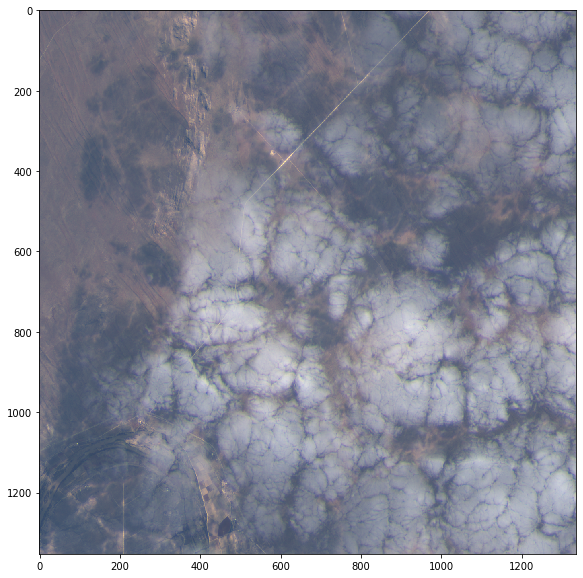

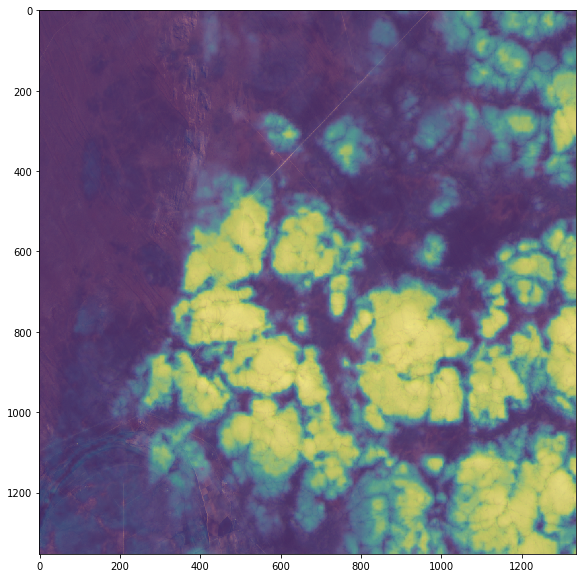

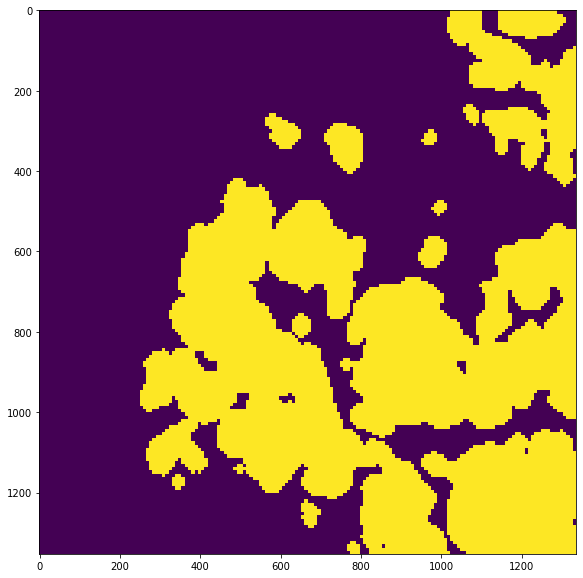

In [19]:
plt.figure(figsize=(10,10))
plt.imshow(np.clip(patch.data['BANDS'][9][..., [2, 1, 0]] * 3.5, 0, 1))
plt.show()


plt.figure(figsize=(10,10))
plt.imshow(np.clip(patch.data['BANDS'][9][..., [2, 1, 0]] * 3.5, 0, 1))
plt.imshow(patch.data['CLP'][9].squeeze(),alpha =0.5)


plt.figure(figsize=(10,10))
plt.imshow(patch.mask['CLM'][9].squeeze())
plt.show()



In [18]:

class LULC(Enum):
    NO_DATA        = (0,  'No Data',          'black')
    COTTON         = (1,  'Cotton',           'xkcd:lime')
    DATES          = (2,  'Dates',            'xkcd:darkgreen')
    GRASS          = (3,  'Grass',            'orange')
    LUCERN         = (4,  'Lucern',           'xkcd:tan')
    MAIZE          = (5,  'Maize',            'xkcd:azure')
    PECAN          = (6,  'Pecan',            'xkcd:lightblue')
    VACANT         = (7,  'Vacant',           'xkcd:beige')
    VINEYARD       = (8,  'Vineyard',         'crimson')
    VINEYARD_PECAN = (9,  'Vineyard & Pecan', 'xkcd:lavender')
    
    def __init__(self, val1, val2, val3):
        self.id = val1
        self.class_name = val2
        self.color = val3
        
# Reference colormap things
lulc_cmap = mpl.colors.ListedColormap([entry.color for entry in LULC])
lulc_norm = mpl.colors.BoundaryNorm(np.arange(-0.5, 11, 1), lulc_cmap.N)

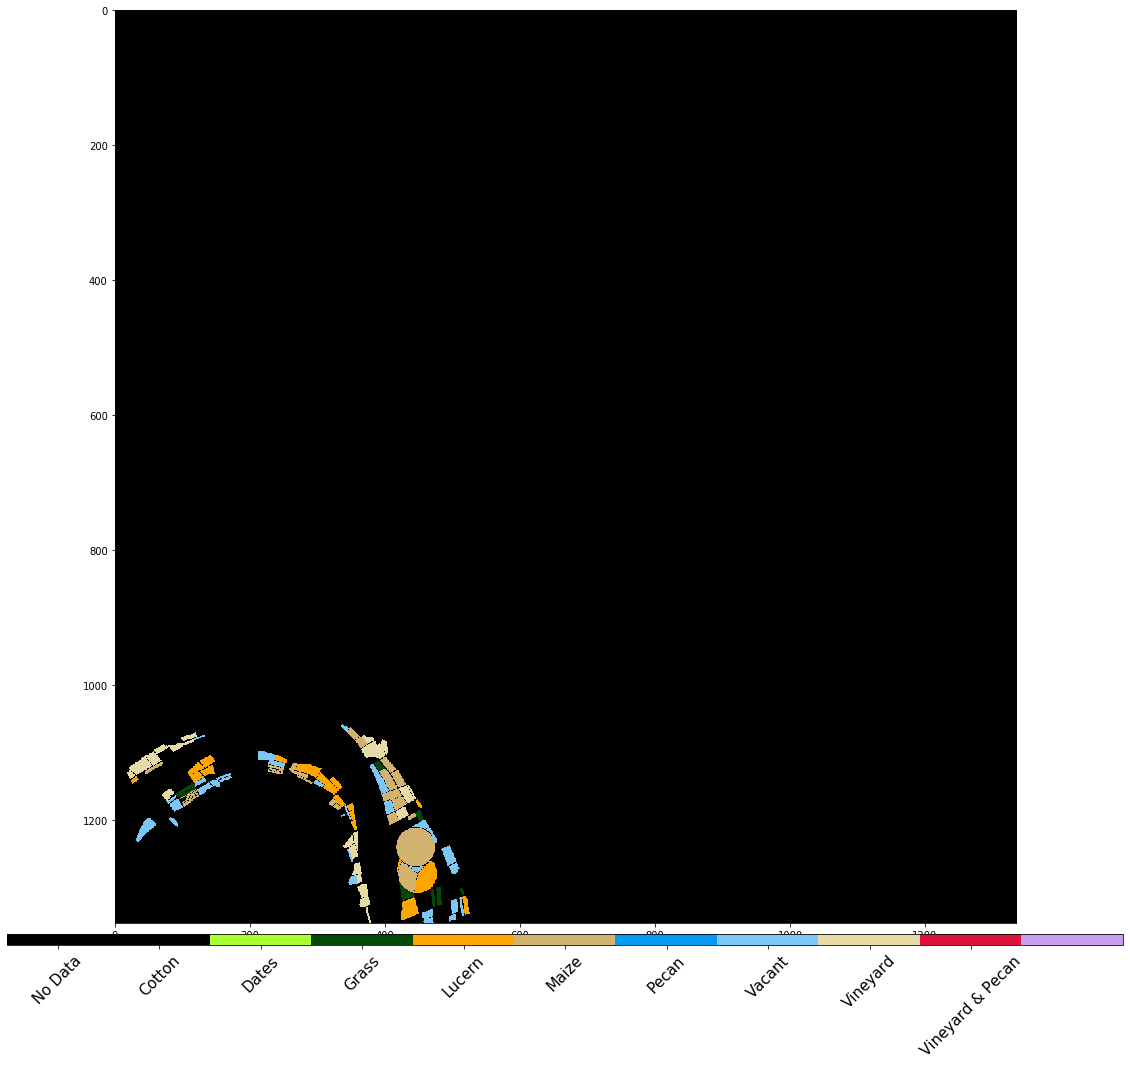

In [16]:
fig = plt.figure(figsize=(20, 20))

fig.add_subplot()

ax = fig.axes[0]

im = plt.imshow(patch.mask_timeless['LULC'].squeeze(), cmap=lulc_cmap, norm=lulc_norm)


fig.subplots_adjust(wspace=0, hspace=0)

cb = fig.colorbar(im, ax=ax, orientation='horizontal', pad=0.01, aspect=100)
cb.ax.tick_params(labelsize=20) 
cb.set_ticks([entry.id for entry in LULC])
cb.ax.set_xticklabels([entry.class_name for entry in LULC], rotation=45, fontsize=15)
plt.show()